In [4]:
import sys
sys.path.append('../satclip')

In [5]:
from model import *
from location_encoder import *

/opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.0'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [16]:
from model import *
from location_encoder import *

model = SatCLIP(
    embed_dim=512,
    image_resolution=640, in_channels=3, vision_layers=4, vision_width=768, vision_patch_size=32, # Image encoder
    le_type='sphericalharmonics', pe_type='siren', legendre_polys=10, frequency_num=16, max_radius=360, min_radius=1, harmonics_calculation='analytic'  # Location encoder
)

img_batch = torch.randn(32, 3, 640, 640) # Represents a batch of 32 images
loc_batch = torch.randn(32, 2) # Represents the corresponding 32 locations (lon/lat)

with torch.no_grad():
    logits_per_image, logits_per_coord = model(img_batch, loc_batch)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()

using vision transformer


In [17]:
logits_per_coord.shape, logits_per_image.shape, probs.shape

(torch.Size([32, 32]), torch.Size([32, 32]), (32, 32))

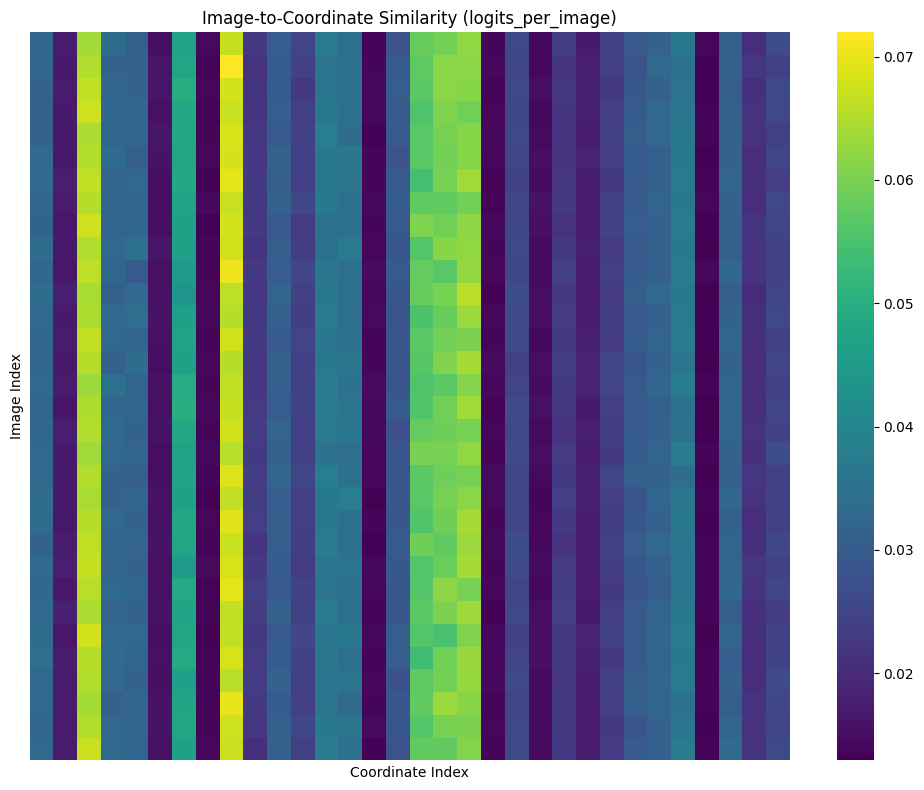

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert logits to numpy if not already
logits = probs

plt.figure(figsize=(10, 8))
sns.heatmap(logits, cmap="viridis", xticklabels=False, yticklabels=False, cbar=True)
plt.title("Image-to-Coordinate Similarity (logits_per_image)")
plt.xlabel("Coordinate Index")
plt.ylabel("Image Index")
plt.tight_layout()
plt.show()
